In [1]:
#!sudo apt install -q tesseract-ocr
!pip install -q pytesseract

In [2]:
import pytesseract
from pytesseract import Output
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt




In [3]:





def Exact_banner(img) :

    low_red = np.array([168, 100, 210], dtype=np.uint8)
    high_red = np.array([175, 220,255], dtype=np.uint8)

    hsv  = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, low_red, high_red)
    
    yimg = None
    yimgo = None

    contour,hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    if len(contour) > 0 :
      
       contour          = sorted(contour, key=cv2.contourArea, reverse=False)
       x,y,w,h           = cv2.boundingRect(contour[-1])
       mask_img1         = mask[y:y+h,x:x+w]
       img1              = img[y:y+h,x:x+w] 

       inverse_mask_img1 = cv2.bitwise_not( mask_img1)
       contour,hierarchy = cv2.findContours(inverse_mask_img1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
       contours          = sorted(contour, key=cv2.contourArea, reverse=False)

       x,y,w,h           = cv2.boundingRect(contours[-1])
       yimg              = img1[y:y+h,x:x+w,:]

       
       # Grayscale
       gray = cv2.cvtColor(yimg,cv2.COLOR_BGR2GRAY)
       blurred = cv2.GaussianBlur( gray, (3, 3), 0)

      # Find Canny edges
       edged = cv2.Canny(blurred, 30, 200)

       contours, hierarchy = cv2.findContours(edged , cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

       contours = sorted(contours, key=cv2.contourArea, reverse=False)

       if len(contours) > 0 :
         x,y,w,h           = cv2.boundingRect(contours[-1])
         yimgo              = yimg[y:y+h,x:x+w]



    return yimgo 


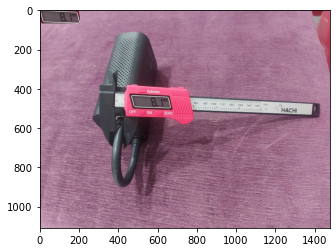

In [4]:
url = "img_vernier/626520.jpg"
img = io.imread(url)
yimg = Exact_banner(img)

h,w,c = yimg.shape
img[0:h,0:w] = yimg


plt.imshow(img)

In [5]:
# capture the video
filename = "img_vernier/vir0.mp4"
cap = cv2.VideoCapture(filename)

# check if capture was successful
if not cap.isOpened(): 
    print("Could not open!")
else:
    print("Video read successful!")
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width        = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height       = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps          = cap.get(cv2.CAP_PROP_FPS)
    
    print('Total frames: ' + str(total_frames))
    print('width: ' + str(width))
    print('height: ' + str(height))
    print('fps: ' + str(fps))

Video read successful!
Total frames: 2432
width: 540
height: 960
fps: 29.850611925270368


In [6]:
savepath = ""
savefile = 'Time_stamp_output.mp4'

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out    = cv2.VideoWriter(savepath+savefile, fourcc, fps, (width,height))
    


cap = cv2.VideoCapture(filename)


for i in range(total_frames-1):

    cap.set(cv2.CAP_PROP_POS_FRAMES, i)    

   # Get the next frame, but don't decode if we're not using it.
    success    = cap.grab()

    ret, image = cap.retrieve()
   

    if  ret :
      duration = i/fps
      text = f"FrameNo {i} Time = {duration:.2f}"
        
        
      imgrgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
     
      yimg = Exact_banner(imgrgb)

      if yimg is not None :  
         h,w,c = yimg.shape
         imgrgb[50:50+h,0:w] = yimg
         cv2.putText(imgrgb, "Icube", (10,height-100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3)
         out.write(cv2.cvtColor(imgrgb, cv2.COLOR_RGB2BGR))
         cv2.imshow("", imgrgb) 
    else :
      break    

    if cv2.waitKey(1) & 0xFF == ord('q'):
      break  
        
        
        
        #
      


        

    
    


out.release()      
cap.release()

In [7]:
imgy

NameError: name 'imgy' is not defined

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\SkywalkerPC\anaconda3\envs\torch\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\SkywalkerPC\anaconda3\envs\torch\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\SkywalkerPC\anaconda3\envs\torch\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\SkywalkerPC\anaconda3\envs\torch\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionReset